In [50]:
import numpy as np
import matplotlib.pyplot as plt
import math as mat
import matplotlib
from matplotlib import gridspec
from scipy.optimize import curve_fit
import pylab as pylt
from scipy.constants import c,h #ver que onda las unidades de h

#### Parametros graficos

In [51]:
matplotlib.rcParams['font.sans-serif'] = "Comic Sans MS"
matplotlib.rcParams['font.family'] = "Serif"

# Get current size
fig_size = plt.rcParams["figure.figsize"]
  
#Set the font size    
matplotlib.rcParams['font.size'] = '18'    
    
# Set figure width to 12 and height to 9
fig_size[0] = 14
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

#### Funciones

In [52]:
def cortator(L,mini,maxi):
    '''Funcion que corta los elementos de una lista (los elementos deben ser np arrays)'''
    return L[mini:maxi]
    

In [53]:
def frecuentiator(lam):
    '''Se pasan los espectros al espacio de frecuencias'''
    cm=c*1e6         #(en micrómetros por segundo)
    return cm/lam

In [54]:
def blackbody_num(n, T):
    """ Blackbody as a function of wavelength (um) and temperature (K).

    returns units of erg/s/cm^2/cm/Steradian  
    """
    from scipy.constants import h,k,c
    bb = 2*h*n**3 / c**2 *(1/ (np.exp(h*n / (k*T)) - 1))
    return bb/np.mean(bb)

#### Lectura y transformacion de los espectros

In [55]:
### Lista de archivos que contienen los espectros
Files_continuo = ['cont_neg_18.txt','cont_neg_17.txt','cont_neg_16.txt','cont_neg_15.txt','cont_neg_14.txt', 'cont_neg_13.txt','cont_neg_12.txt', 'cont_neg_11.txt','cont_neg_10.txt', 'cont_neg_09.txt', 'cont_neg_08.txt', 'cont_neg_07.txt', 'cont_neg_06.txt', 'cont_neg_05.txt', 'cont_neg_04.txt', 'new_cont_03_neg.txt', 'cont_neg_02.txt', 'cont_neg_01.txt','cont01.txt','cont02.txt','cont03.txt','cont04.txt','cont05.txt','cont06.txt','cont07.txt','cont08.txt','cont09.txt','cont10.txt','cont11.txt','cont12.txt','cont13.txt','cont14.txt','cont15.txt','cont16.txt','cont17.txt','cont18.txt', '17mas18.txt','cexterno10px.txt']
#Files_continuo[4:32] Este es el rango donde los espectros son ajustables


In [56]:
# Se leen los archivos que contienen los espectros

Lwt = []
Lit = []

for i in range(len(Files_continuo)):
    w1,i1= np.loadtxt(Files_continuo[i], unpack=True)     
    Lwt.append(w1)
    Lit.append(i1) 
   

In [57]:
#Se cortan los espectros y se los pasa a frecuencia

Lw = []
Ni = []
Frec_exces = []
low_lim  = 310
upper_lim = 1130

for i in range(len(Lit)):
    lw = cortator(Lwt[i],low_lim, upper_lim)*0.0001  #pasa la longitud de onda a micrometros
    Lw.append(lw)
    
    frec = frecuentiator(lw)
    Frec_exces.append(frec)
    
    lim = cortator(Lit[i],low_lim, upper_lim)
    li = lim/np.mean(lim)
    Ni.append(li)

#### Construccion de los excesos rojos

In [58]:
# Se construyen los excesos restando el espectro off-nuclear (debe estar almacenado en el ultimo elemento de la lista)

Exc = []
for i in range(len(Ni)):
    exc = Ni[i]-Ni[-1] +1 
    Exc.append(exc)
    

#### Ajuste de los excesos

In [59]:
#Se ajustan las funciones Black_Body a todos los excesos

t = 1
Frec_evaluate = Frec_exces[t]
Exces_evaluate = Exc[t]

Temperaturas = np.array([])
T_err = np.array([])

for i in range(len(Lit)):
    Frec_evaluate = Frec_exces[i]
    Exces_evaluate = Exc[i]
    popt, pcov = curve_fit(blackbody_num, Frec_evaluate, Exces_evaluate, p0=(1200))
    Temperaturas = np.append(Temperaturas, popt)
    T_err = np.append(T_err, pcov)

In [60]:
radio = np.arange(-14,14)*8.2 #ojo, aca habria que hacer el radio en toda su extension y cortarlo con[4:32]

In [61]:
### Errores estimados artesanalmente (hay que definir criterios y automatizar)

T_err_inf = Temperaturas[4:32] - np.array([1400, 1600, 1500, 1350, 1150, 1250, 1150, 1200, 1250, 1450,1400,1350, 1450, 1250, 1250,1300, 1250, 1350, 1400, 1300,1300,1250,1250,1300, 1400, 1400, 1300, 1300])
Terr_sup = np.array([2000,2200,1900, 1650, 1450,1400, 1450, 1400, 1500, 1750,1800, 1900, 1700,1500, 1400,1500, 1400,1550, 1600, 1500, 1500,1350,1500,1650, 1650, 1600, 1500, 1500])- Temperaturas[4:32]
T_err = np.array([T_err_inf,Terr_sup])


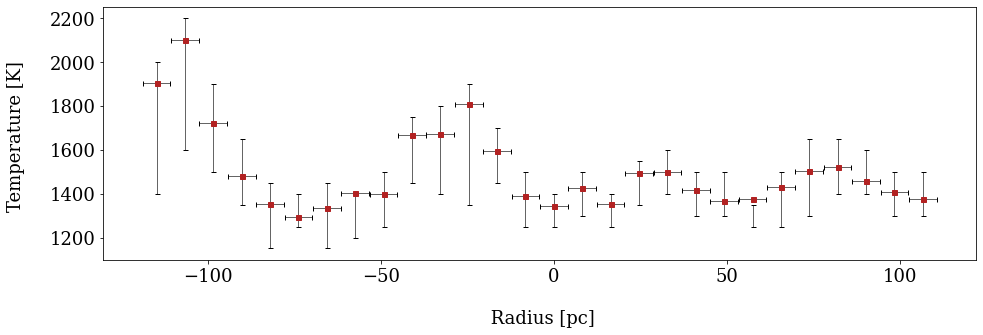

In [62]:
### Plot de la distribucion radial de temperaturas
fig = plt.figure()

plt.errorbar(radio, Temperaturas[4:32], fmt='s', label="data",markersize=5, color="firebrick",
            xerr=4, yerr=T_err, ecolor='black', capsize=2.5, linewidth=0.6)
plt.xlabel('\n Radius [pc]')
plt.ylabel ('Temperature [K] \n')

plt.tight_layout()

fig.savefig("dust-radial.pdf")
fig.savefig("dust-radial.png")